## 回帰モデル



In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

pd.options.display.max_columns = None

In [3]:
dataset_base = pd.read_csv("baseball_salary.csv")
dataset_base.head()

,球団,推定年俸,守備,年数,年齢,身長,体重,血液型,投打,年,打率,試合,打席数,打数,安打,本塁打,打点,盗塁,四球,死球,三振,犠打,併殺打,出塁率,長打率,OPS,RC27,XR27,球団勝率,プレーオフ,球団平均得点,球団打率
0,c,21000,外野手,11,29,177,90,AB型,右左,2017,0.308,143,651,556,171,23,92,13,83,4,113,2,6,0.398,0.505,0.903,7.70,7.52,0.633,2,5.15,0.273
1,c,19000,内野手,7,28,171,72,A型,右右,2017,0.271,138,629,565,153,14,56,8,32,1,107,30,9,0.311,0.405,0.716,4.10,4.01,0.633,2,5.15,0.273
2,c,14000,内野手,5,29,171,85,A型,右左,2017,0.290,143,679,565,164,8,60,35,89,15,120,6,5,0.398,0.407,0.805,6.41,6.26,0.633,2,5.15,0.273
3,c,11500,内野手,7,38,196,126,不明,右右,2017,0.265,116,405,344,91,27,78,0,50,8,111,0,8,0.368,0.532,0.900,6.80,6.90,0.633,2,5.15,0.273
4,c,11000,内野手,20,41,189,102,B型,右右,2017,0.292,100,288,243,71,9,48,2,40,1,56,0,7,0.389,0.461,0.850,6.55,6.54,0.633,2,5.15,0.273


In [4]:
dataset = dataset_base[['推定年俸', '打点', '年数', '打率', '本塁打', '球団勝率']]

dataset = dataset.rename(columns={'推定年俸': 'salary', '打点': 'points', '年数': 'years_exp', \
    '打率': 'batting', '本塁打': 'homerun', '球団勝率': 'team_win'})

dataset.head()

,salary,points,years_exp,batting,homerun,team_win
0,21000,92,11,0.308,23,0.633
1,19000,56,7,0.271,14,0.633
2,14000,60,5,0.290,8,0.633
3,11500,78,7,0.265,27,0.633
4,11000,48,20,0.292,9,0.633


### データの前処理



In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
dataset_std = sc.fit_transform(dataset)
dataset_std.shape

(241, 6)

In [6]:
Y = dataset_std[:, 0]

X = dataset_std[:, 1:]
print("Y:", Y.shape)
print("X:", X.shape)

Y: (241,)
X: (241, 5)


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [8]:
print("Y_train=", Y_train.shape, ", X_train=", X_train.shape)
print("Y_valid=", Y_valid.shape, ", X_valid=", X_valid.shape)
print("Y_test=", Y_test.shape, ", X_test=", X_test.shape)

Y_train= (117,) , X_train= (117, 5)
Y_valid= (51,) , X_valid= (51, 5)
Y_test= (73,) , X_test= (73, 5)


In [9]:
model = keras.Sequential()

model.add(Dense(8, activation='relu', input_shape=(5,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(optimizer = "rmsprop", loss='mse', metrics=['mae'])

2022-03-21 06:14:07.306801: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-21 06:14:07.306839: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-21 06:14:07.306864: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-31-10-220): /proc/driver/nvidia/version does not exist
2022-03-21 06:14:07.307059: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-03-21 06:14:07.314033: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2300060000 Hz
2022-03-21 06:14:07.314303: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f9070000b20 initialized for platform Host (this does not guarante

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 48        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [11]:
# モデルの作成
model = keras.Sequential()
model.add(Dense(8, activation='relu', input_shape=(5,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(optimizer = "rmsprop", loss='mse', metrics=['mae'])

# 学習の実施
log = model.fit(X_train, Y_train, epochs=1000, batch_size=64, verbose=False,
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                         min_delta=0, patience=100, 
                                                         verbose=1)],
         validation_data=(X_valid, Y_valid))

Epoch 00474: early stopping


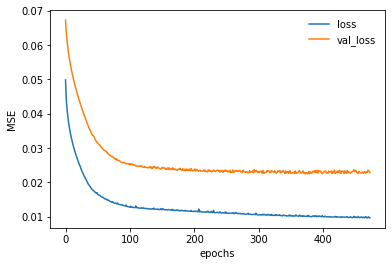

In [12]:
# グラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) # 凡例の表示
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.show()

# テストデータによる評価

In [13]:
Y_pred = model.predict(X_test)

#### このままだと、正規化した予測値であるため、年俸に復元する。

In [14]:
Y_test_ = sc.inverse_transform(np.hstack([Y_test.reshape(len(Y_test), 1), X_test]))[:, 0]
Y_pred_ = sc.inverse_transform(np.hstack([Y_pred.reshape(len(Y_pred), 1), X_test]))[:, 0]

In [15]:
# MSE(平均二乗誤差)を算出
mse = mean_squared_error(Y_test_, Y_pred_)
print('MSE(Keras回帰モデル):', mse)

MSE(Keras回帰モデル): 44331036.0169192


# グラフによる可視化

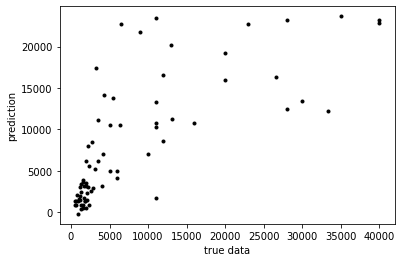

In [16]:
# 散布図の表示
plt.plot(Y_test_, Y_pred_, 'k.')
plt.xlabel("true data")
plt.ylabel("prediction")
plt.show()